In [1]:
# General Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time

# General Mathematics package
import math as math

# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Statistics Packages
from scipy.stats import randint
from scipy.stats import skew

# Machine Learning Packages
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn import preprocessing
from skimage.transform import resize
import xgboost as xgb

# Neural Network Packages
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import tensorflow as tf

# H2o packages
import h2o
from h2o.automl import H2OAutoML

Using TensorFlow backend.


In [4]:
adult = pd.read_csv("adult.data.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [119]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null category
education-num     32561 non-null category
marital-status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null category
salary            32561 non-null category
dtypes: category(10), int64(4)
memory usage: 2.1 MB


In [118]:
adult.iloc[:,1] = pd.Categorical(adult.iloc[:,1])
adult.iloc[:,3] = pd.Categorical(adult.iloc[:,3])
adult.iloc[:,4] = pd.Categorical(adult.iloc[:,4])
for n in range(5,9):
    adult.iloc[:,n] = pd.Categorical(adult.iloc[:,n])

adult.iloc[:,-1] = pd.Categorical(adult.iloc[:,-1])
adult.iloc[:,-2] = pd.Categorical(adult.iloc[:,-2])

In [7]:
adult.replace("?" , "Unknown" , inplace = True)

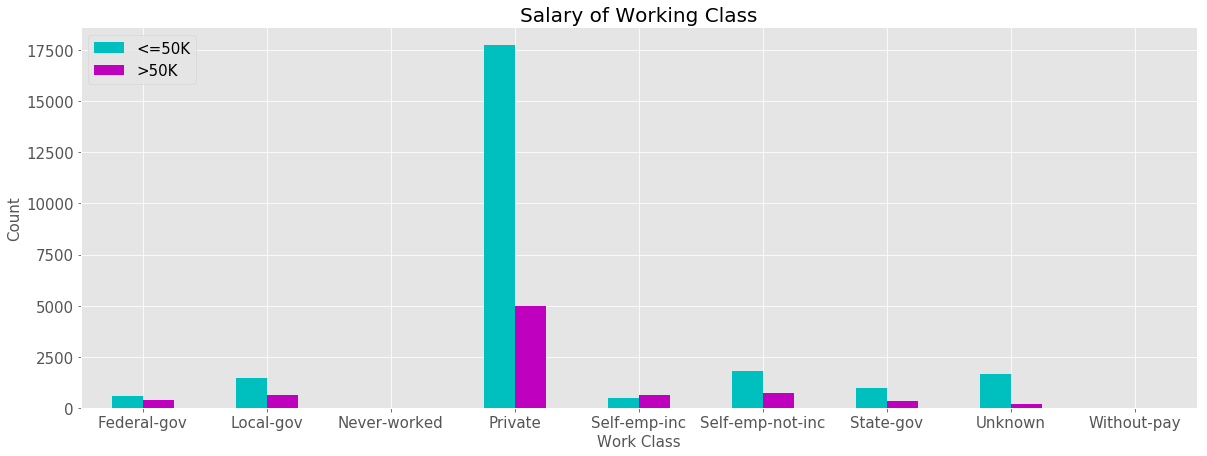

In [59]:
pd.crosstab(adult.workclass , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 360, size = 15)
plt.yticks(size = 15)
plt.xlabel("Work Class" , size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.title("Salary of Working Class" , size = 20)
plt.show()

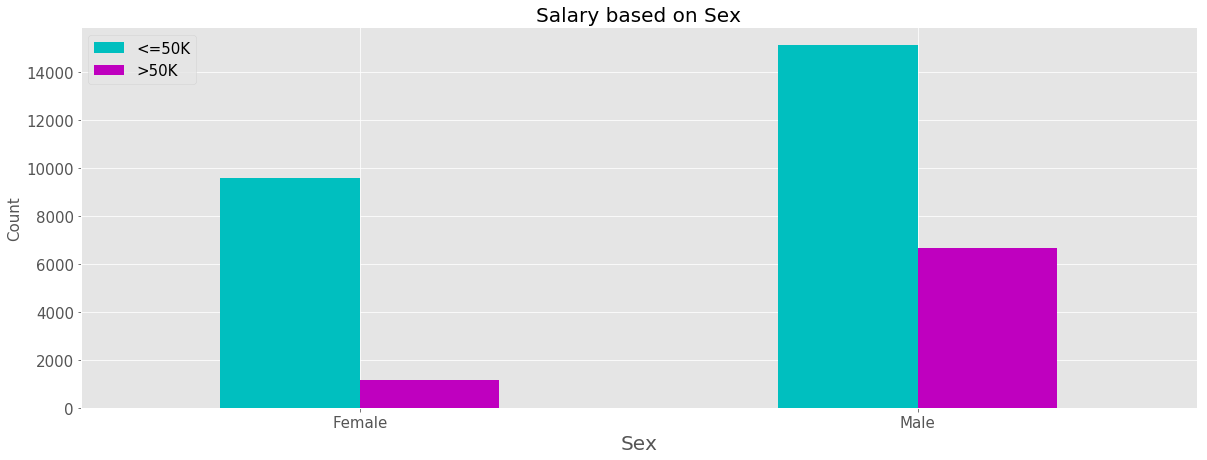

In [98]:
pd.crosstab(adult.sex , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 360, size = 15)
plt.yticks(size = 15)
plt.xlabel("Sex" , size = 20)
plt.ylabel("Count" , size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.title("Salary based on Sex" , size = 20)
plt.show()

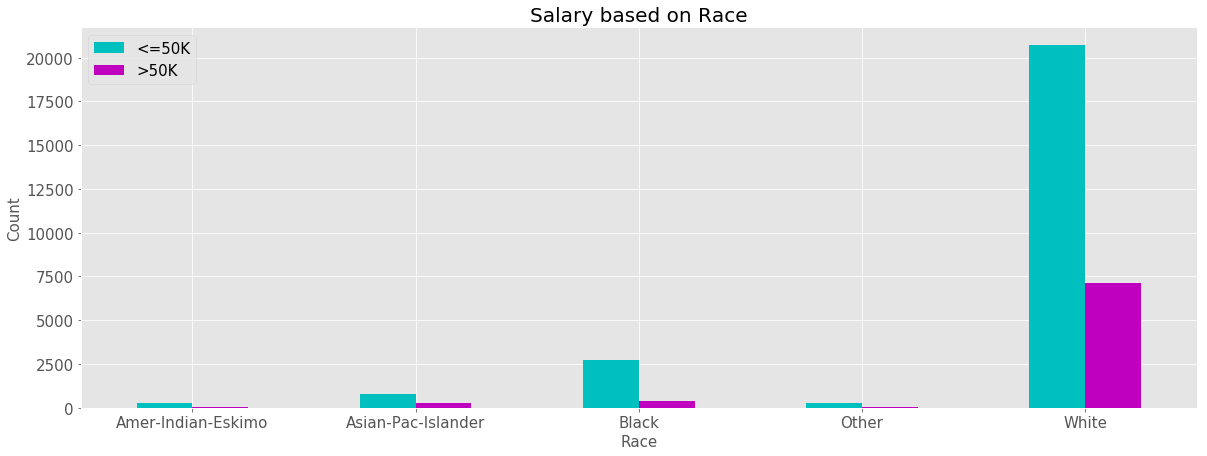

In [94]:
pd.crosstab(adult.race , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 360, size = 15)
plt.yticks(size = 15)
plt.xlabel("Race" , size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.title("Salary based on Race" , size = 20)
plt.show()

In [69]:
adult.education.value_counts()

HS-grad               10501
Some-college           7291
Bachelors              5355
High School            3055
Masters                1723
Assoc-voc              1382
Assoc-acdm             1067
Junior High School      646
Prof-school             576
Elementary School       552
Doctorate               413
Name: education, dtype: int64

In [68]:
adult.education.replace(["Preschool" , "1st-4th" , "5th-6th" , "7th-8th" , "9th" , "10th" , "11th" , "12th"] ,
                        ["Elementary School" , "Elementary School" , 'Elementary School' , "Junior High School" , 
                         "High School" , "High School" , "High School" , "High School"] , inplace = True)

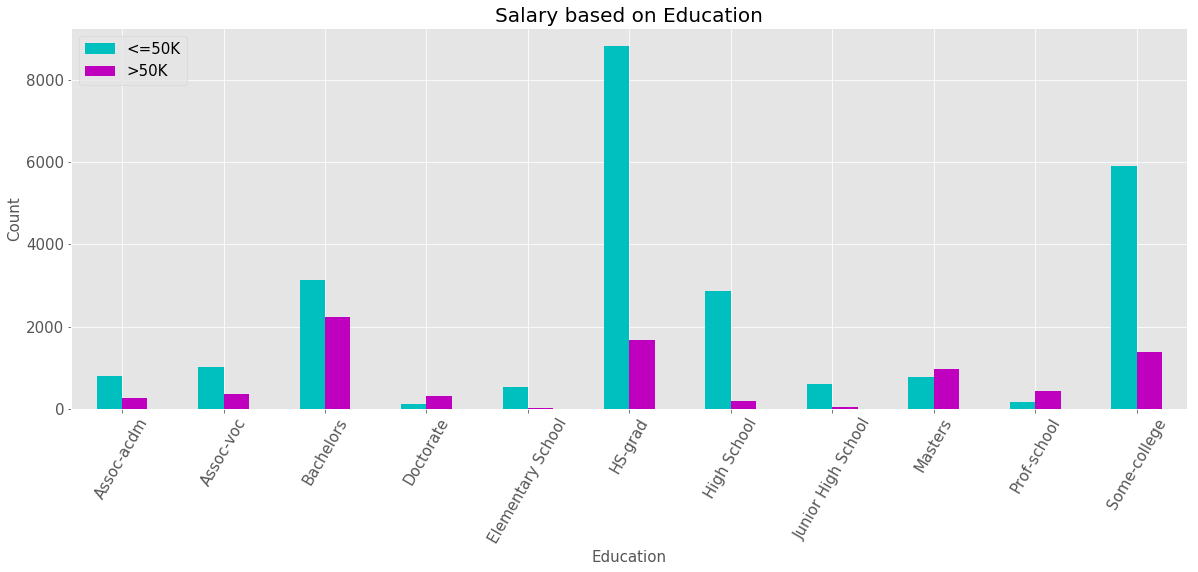

In [78]:
pd.crosstab(adult.education , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 60, size = 15)
plt.yticks(size = 15)
plt.xlabel("Education" , size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.title("Salary based on Education" , size = 20)
plt.show()

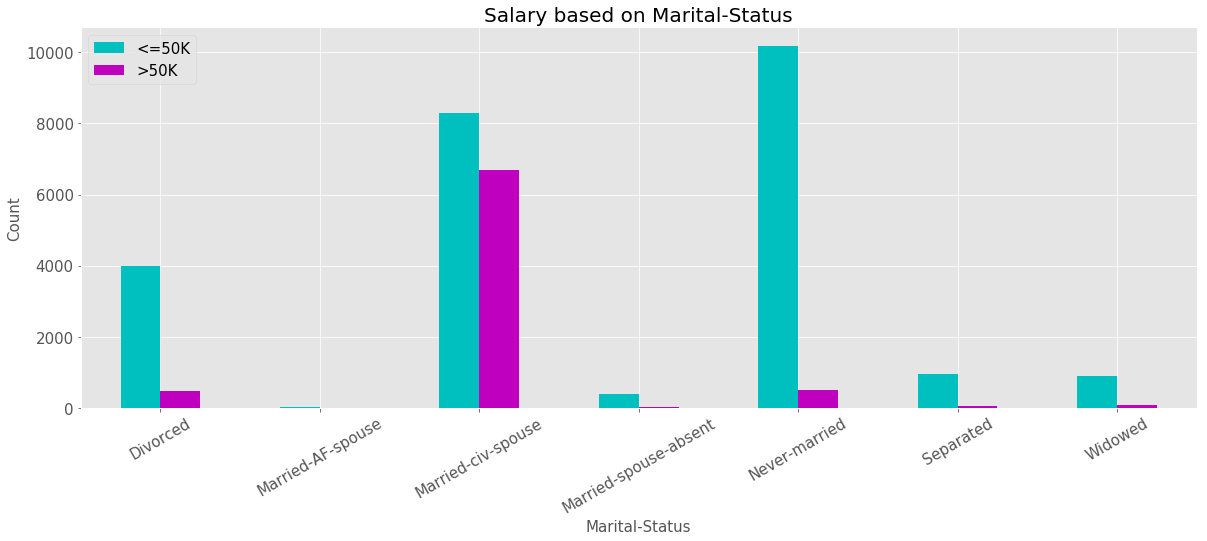

In [87]:
pd.crosstab(adult["marital-status"] , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 30, size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital-Status" , size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(loc=2, prop={'size': 15})
plt.title("Salary based on Marital-Status" , size = 20)
plt.show()

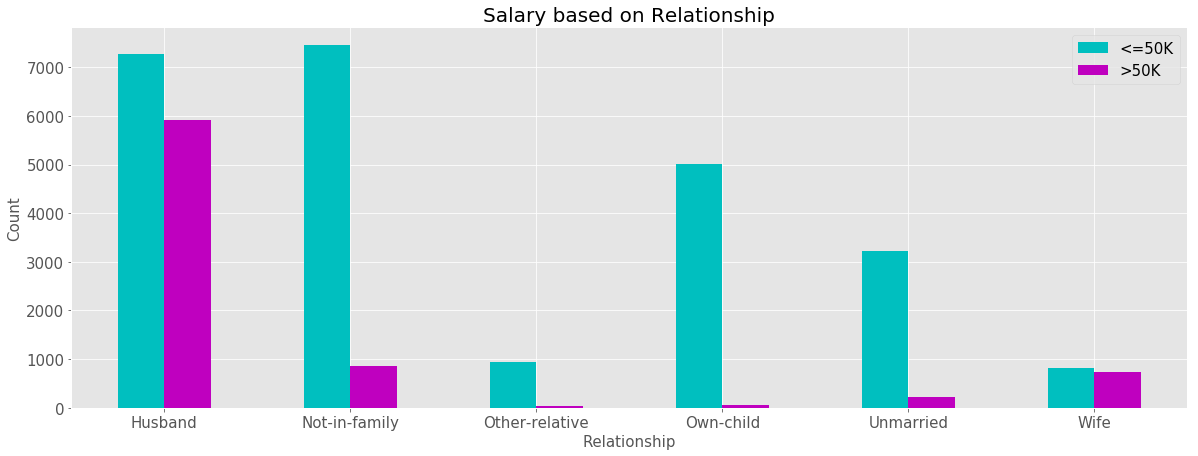

In [102]:
pd.crosstab(adult.relationship , adult.salary).plot.bar(figsize = (20,7) , color = "cm")
plt.xticks(rotation = 360, size = 15)
plt.yticks(size = 15)
plt.xlabel("Relationship" , size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(loc=1, prop={'size': 15})
plt.title("Salary based on Relationship" , size = 20)
plt.show()

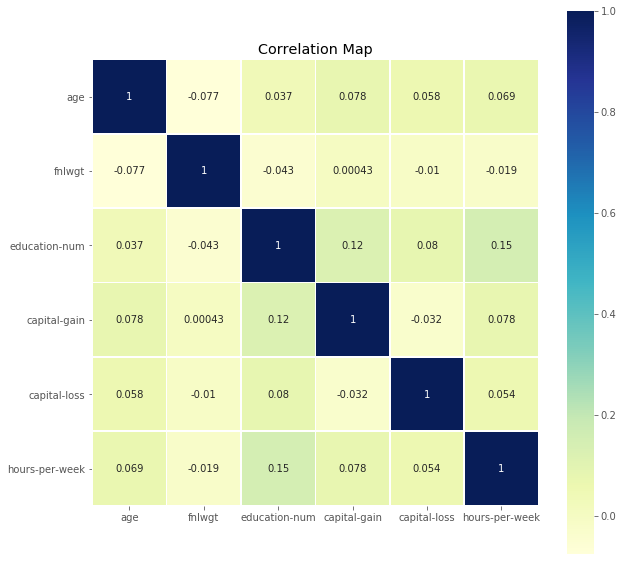

In [108]:
plt.figure(figsize = (10,10))
sns.heatmap(adult.corr() , square = True , annot = True , 
            linewidths=.8 , cmap="YlGnBu")
plt.title("Correlation Map")
plt.show()

In [124]:
adult.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,13,2,9,5,2,0,0,0,40,4,0


In [114]:
adult.drop("education" , axis = 1 , inplace = True)

In [126]:
le = preprocessing.LabelEncoder()
for n in range(4,9):
    adult.iloc[:,n] = le.fit_transform(adult.iloc[:,n])
adult.iloc[:,1] = le.fit_transform(adult.iloc[:,1])
adult.iloc[:,-1] = le.fit_transform(adult.iloc[:,-1])
adult.iloc[:,-2] = le.fit_transform(adult.iloc[:,-2])

adult.iloc[:,1] = pd.Categorical(adult.iloc[:,1])
adult.iloc[:,3] = pd.Categorical(adult.iloc[:,3])
adult.iloc[:,4] = pd.Categorical(adult.iloc[:,4])
for n in range(5,9):
    adult.iloc[:,n] = pd.Categorical(adult.iloc[:,n])

adult.iloc[:,-1] = pd.Categorical(adult.iloc[:,-1])
adult.iloc[:,-2] = pd.Categorical(adult.iloc[:,-2])

In [131]:
X_salary = adult.drop(["salary"] , axis = 1)
y_salary = adult["salary"]

X_train, X_test, y_train, y_test = train_test_split(X_salary, y_salary, test_size = 0.3, random_state=42)

In [133]:
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_test)

#print(confusion_matrix(y_val,y_pred))
print(classification_report(y_test , y_pred))
print("accuracy",round(accuracy_score(y_test , y_pred)*100,2),"%")

             precision    recall  f1-score   support

          0       0.81      0.96      0.88      7455
          1       0.71      0.28      0.40      2314

avg / total       0.79      0.80      0.77      9769

accuracy 80.32 %


In [134]:
tree = DecisionTreeClassifier()

tree.fit(X_train , y_train)
y_pred_DT = tree.predict(X_test)
#print(confusion_matrix(y_val,y_pred))
print(classification_report(y_test , y_pred_DT))
print("accuracy:",round(accuracy_score(y_test , y_pred_DT)*100,2) , "%")

             precision    recall  f1-score   support

          0       0.88      0.87      0.88      7455
          1       0.60      0.63      0.61      2314

avg / total       0.82      0.81      0.81      9769

accuracy: 81.28 %


In [135]:
param_dist = {'max_depth' : [3,None],
             'max_features' : np.arange(1,9),
             'min_samples_leaf':np.arange(1,9),
             "criterion" :["gini" , "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree , param_dist , cv = 10 , verbose = 1)
tree_cv.fit(X_train , y_train)
y_pred_RF = tree_cv.predict(X_test)
#print(confusion_matrix(y_val,y_pred))
print(classification_report(y_test , y_pred_RF))
print("accuracy:",round(accuracy_score(y_test , y_pred_RF)*100,2),"%")

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=1)]: Done 2560 out of 2560 | elapsed:  4.1min finished


             precision    recall  f1-score   support

          0       0.88      0.92      0.90      7455
          1       0.68      0.59      0.63      2314

avg / total       0.83      0.84      0.83      9769

accuracy: 83.86 %


In [136]:
param_dist = {'max_depth' : [3,None],
             'max_features' : np.arange(1,9),
             'min_samples_leaf':np.arange(1,9),
             "criterion" :["gini" , "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree , param_dist , cv = 10 , verbose = 1)
tree_cv.fit(X_train , y_train)
y_pred_RF = tree_cv.predict(X_test)
#print(confusion_matrix(y_val,y_pred))
print(classification_report(y_test , y_pred_RF))
print("accuracy:",round(accuracy_score(y_test , y_pred_RF)*100,2),"%")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.2s finished


             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7455
          1       0.72      0.59      0.65      2314

avg / total       0.84      0.85      0.84      9769

accuracy: 84.87 %


In [137]:
warnings.filterwarnings("ignore")

clf = SVC()

clf.fit(X_train , y_train)

y_pred_SVC = clf.predict(X_test)

print(classification_report(y_test , y_pred_SVC))
print('accuracy:' , round(accuracy_score(y_test , y_pred_SVC)*100,2),"%")

             precision    recall  f1-score   support

          0       0.76      1.00      0.87      7455
          1       0.73      0.00      0.01      2314

avg / total       0.76      0.76      0.66      9769

accuracy: 76.36 %


In [142]:
adult_int = adult[0:-1].astype("int64")

X_boost = adult_int.drop(["salary"] , axis = 1)
y_boost = adult_int["salary"]

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_boost, y_boost, test_size = 0.3, random_state=42)

In [143]:
warnings.filterwarnings("ignore")

xg = xgb.XGBClassifier(objective='reg:logistic', n_estimators = 10, seed=1234)
xg.fit(X_train_int, y_train_int)

y_pred_XGB = xg.predict(X_test_int)

print("accuracy:",round(accuracy_score(y_test_int, y_pred_XGB)*100,2) , "%")

accuracy: 84.51 %
